<a href="https://www.kaggle.com/code/ebrukrkkay/seaborn-practice?scriptVersionId=102050494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Contents
* Poverty rate of each state
* Most common 15 Name or Surname of killed people
* High school graduation rate of the population that is older than 25 in states
* Percentage of state's population according to races that are black, white,native american, asian and hispanic
* High school graduation rate vs Poverty rate of each state
* Kill properties
* Race rates according to states in kill data
* Kill numbers from states in kill data

1. [Bar Plot](#1)
2. [Point Plot](#2)
3. [Joint Plot](#3)
4. [Pie Chart](#4)
5. [Lm Plot](#5)
6. [Kde Plot](#6)
7. [Violin Plot](#7)
8. [Heatmap](#8)
9. [Box Plot](#9)
10. [Swarm Plot](#10)
11. [Pair Plot](#11)
12. [Count Plot](#12)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


In [2]:
# Read datas
# Veri setindeki tüm csv dosyalarını koyup bir değişkene atalım
median_house_hold_in_come = pd.read_csv('../input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level= pd.read_csv('../input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding='windows-1252')
percent_over_25_completed_highSchool = pd.read_csv('../input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv', encoding='windows-1252')
share_race_city = pd.read_csv('../input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding='windows-1252')
kill = pd.read_csv('../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv',encoding='windows-1252')


In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


Burada 29329 tane obje olduğu ve hepsinin non-null olduğu gözükmektedir. Data frame'e göz atıp bu değerler içerisinde anlamsız bir ifade olup olmadığına bakalım.

In [5]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

201 tane - var ve bunun ne olduğunu bilmiyoruz, detaylı olarak inceleme yapmamıza şu an gerek yok çünkü görselleştirme pratiği yapacağız, bu yüzden bu -'leri 0'a çevirelim.

In [6]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'], 0.0, inplace = True)

# ayrıca poverty_rate özelliği object tipinde bunu float'a dönüştürmemiz gerekiyor.
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)


In [7]:
# her bir eyaletin fakirlik oranına bakacağız bunun için öncelikle hangi eyaletler olduğuna ve sayılarına bakalım
percentage_people_below_poverty_level['Geographic Area'].unique()
# unique() kullanarak dataframe'da olan tüm eyaletlerden yalnızca 1 tane görmeyi sağladık.

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [8]:
len(percentage_people_below_poverty_level['Geographic Area'].unique())
# len ile kaç adet olduklarına da bakabiliriz.

51

<a id='1'></a>
## Bar Plot

Text(0.5, 1.0, 'Poverty Rate Given States')

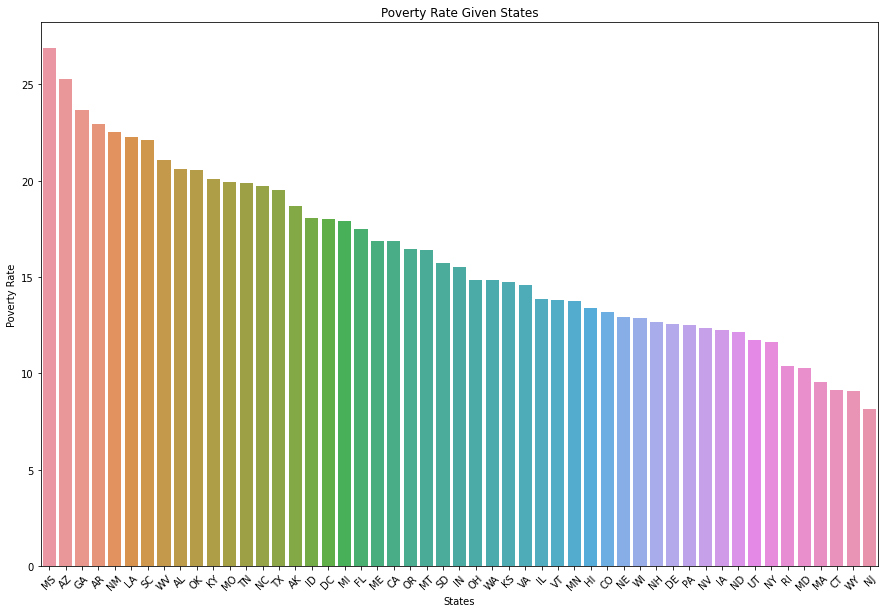

In [9]:
# Poverty Rate of Each State
# bu eyaletleri liste haline getirelim
# bu eyaletlerdeki fakirlik oranını sıralı bir şekilde görmek istiyoruz.
area_list=list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio=[]
for i in area_list:
    x= percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']== i]
    area_poverty_rate= sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

# percentege people below poverty level data frame'de bulunan Geographic Area sütununu i ye eşitleyip her adımda x'e atıyoruz
# x'in poverty rate özelliğini yani Geographic Area'ların sahip olduğu poverty rate'leri toplayıp, tüm alanlara bölüyoruz yani ortalamayı alıyoruz.
# bu ortalamayı da area_poverty_ratio olarak oluşturduğumuz boş listenin içerisine ekliyoruz.

data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio':area_poverty_ratio})
new_index=(data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data= data.reindex(new_index)

# bir data oluşturup içerisinde 2 sütun oluşturuyoruz 
# daha sonrasında ise azalan sırada sıralama işlemi gerçekleştiriyoruz çünkü en yoksul eyaleti bulmamız gerekiyor.
# sorted data olarak oluşturduğumuz veri ise new_index'teki sıralanmış değer ile yeniden indexleniyor.

# VISUALIZATION
plt.figure(figsize=(15,10))     # bir şekil belirleme
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])  # seaborn kütüphanesinden barplot'un x'i ve y'si hangi sütunlar olacak o belirlendi.
plt.xticks(rotation=45)         # x ekseninde bulunan bar isimlerinin nasıl yazılacağının açısını verdik, eyalet isimleri yatay olarak yazılırsa birbirlerine karışabilir.
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [10]:
# kill df'nin içerisinde neler olduğuna bakalım
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

Burada 49 adet TK TK isimnde öldürülen insan varmış, TK TK olarak isim ve soyisim olamayacağına göre ismi bulunamayanlar bu şekilde kaydedilmiştir.

Text(0.5, 1.0, 'Most common 15 name or surname of killed people')

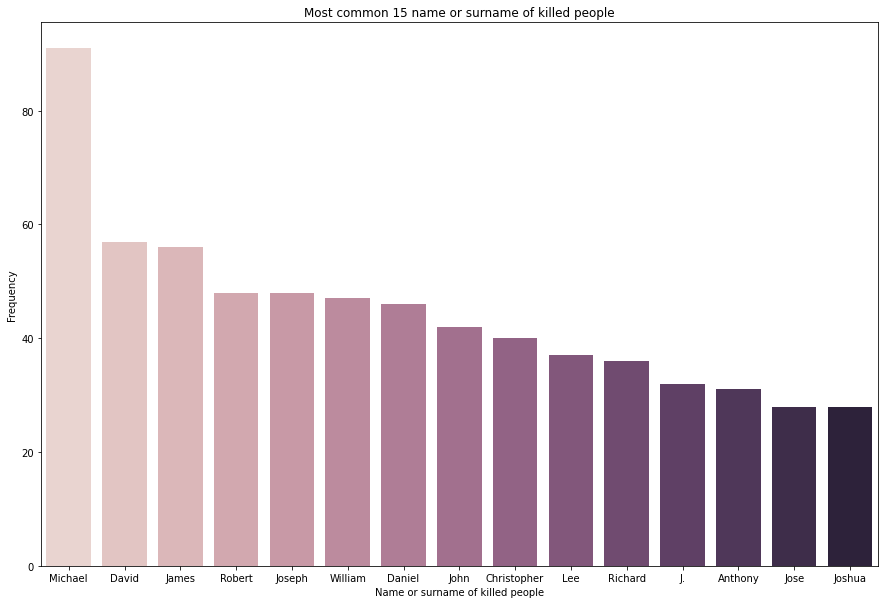

In [12]:
# Most common 15 Name or Surname of killed people
separate= kill.name[kill.name != 'TK TK'].str.split()  # TK TK olanları verinin içerisine dahil etmek istemiyoruz.
a,b= zip(*separate)                                    # TK TK haricindeki isimleri boşluk ifadesinden split() ile ikiye ayırıyoruz
name_list=a+b                                          # ayrılan isim ve soyisimi bir tuple içinde birleştiriyoruz
name_count=Counter(name_list)                          # her bir isimden kaç tane olduğu hesaplanıyor
most_common_names=name_count.most_common(15)           # en yaygın 15 ismi hesaplıyoruz
x, y= zip(*most_common_names)                          # isim ve soyisimleri yine unzip yapıyoruz
x, y= list(x), list(y)                                 # iki liste haline getirdik.

# visualization
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x, y=y, palette= sns.cubehelix_palette(len(x)))    # seaborn metodu ile palette grafik oluşturuyoruz içerisine yazılan uzunluk kadar birbirine yakın renklerde bar plot oluşturmamızı sağlıyor
plt.xlabel('Name or surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 name or surname of killed people')

In [13]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [14]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [15]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()
# percent_over_25_completed_highSchool df'de percent_completed_hs sütununun sayısına bakıyoruz.

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

Bu veride 197 tane ne karşılığı olmayan oran bulunmaktadır bunları 0'a çeviriyoruz.

In [16]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

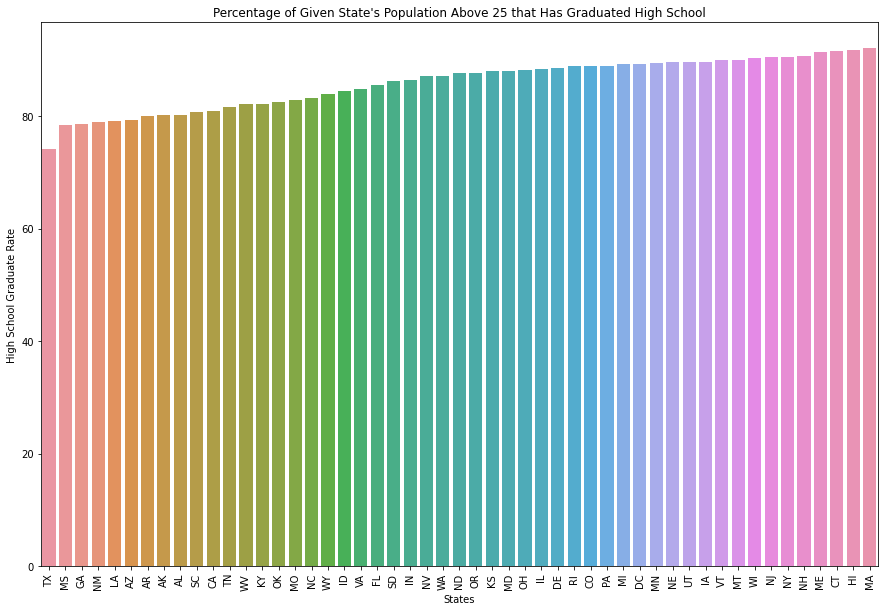

In [17]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True) # -'leri 0.0 yap ve inplace true diyerek df'nin üzerine yazmasını sağla
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)  # object veri tipinde olan sütunu float veri tipine dönüştürdük
area_list= list(percent_over_25_completed_highSchool["Geographic Area"].unique())  # df'de geographic area'lardan unique olanı seç listeye çevir ve area_list olarak ata
area_highschool= []
for i in area_list:
    x= percent_over_25_completed_highSchool[percent_over_25_completed_highSchool["Geographic Area"]==i] # listenin içerisinde dolaşıp eyaletleri filtreliyoruz
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)     # listedeki high school tamamlayanların oranını bul
    area_highschool.append(area_highschool_rate)                # bulunan oranı area_highschool dizisinde sakla

# sorting
data=pd.DataFrame({'area_list': area_list, 'area_highschool_ratio': area_highschool})
new_index= (data['area_highschool_ratio'].sort_values(ascending=True)).index.values    # ascending True yani artana gör sıralama yapılıyor ve bu sıralamanın indexi bulunup new_index'e atılıyor
sorted_data2= data.reindex(new_index)                                                  # sıralanmış yeni index sorted_data2 değişkenine yeniden indexleniyor

#visualization
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])     # x ekseni eyaletler, y ekseni bu eyaletlerdeki mezun olma oranı
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [18]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [19]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [20]:
share_race_city.value_counts()

Geographic area  City                 share_white  share_black  share_native_american  share_asian  share_hispanic
AK               Adak city            19.6         4            5.5                    52.5         8.9               1
OH               Galion city          97.6         0.5          0.1                    0.2          1.3               1
                 Gahanna city         82.1         11.2         0.2                    3.1          2.6               1
                 Fultonham village    100          0            0                      0            0                 1
                 Fulton village       96.9         0            0                      0            1.9               1
                                                                                                                     ..
KS               Westwood Hills city  94.4         1.7          0                      1.9          3.1               1
                 Westphalia city      90.2   

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races")]

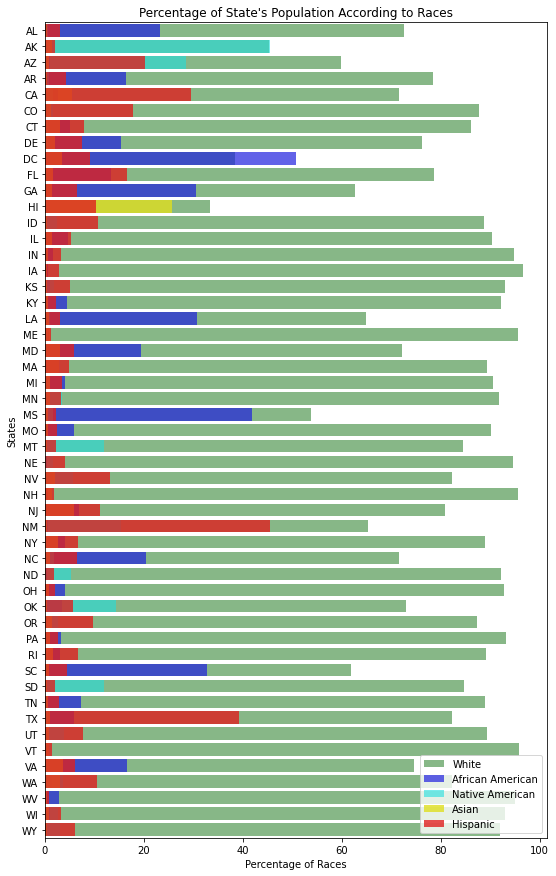

In [21]:
# Percentage of state's population according to races that are black, white, native american, asian and hispanic
share_race_city.replace(['-'],0.0, inplace=True)
share_race_city.replace(['(X)'],0.0, inplace=True)  # inplace true denilerek yapılan işlem share_race_city df'ye kaydedildi.
# veride - veya X gibi değerler varsa bunları sıfırlamamız gerekiyor.

share_race_city.loc[:,['share_white','share_black', 'share_native_american','share_asian','share_hispanic']]= share_race_city.loc[:,['share_white','share_black', 'share_native_american','share_asian','share_hispanic']].astype(float)
# tüm sütunları float veri tipine çevirdik
area_list=list(share_race_city['Geographic area'].unique())  # eyaletlerden unique olanları buluyoruz
share_white=[] 
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]
# her bir ırk için boş liste oluşturuyoruz

for i in area_list:
    x=share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
    
    # her ırkın eyaletlere göre ortalamasını buluyoruz, df'deki ırk değerleri şehirlere göre verilmiştir.

# visualization
f,ax=plt.subplots(figsize=(9,15))
sns.barplot(x=share_white, y=area_list, color='green', alpha=0.5, label='White')
sns.barplot(x=share_black, y=area_list, color='blue', alpha=0.7, label='African American')
sns.barplot(x=share_native_american, y=area_list, color='cyan', alpha=0.6, label='Native American')
sns.barplot(x=share_asian, y=area_list, color='yellow', alpha=0.8, label='Asian')
sns.barplot(x=share_hispanic, y=area_list, color='red', alpha=0.8, label='Hispanic')

ax.legend(loc='lower right', frameon= True)    # sağ altta hangi rengin neyi ifade ettiğini gösteren kutucuk, frameon kutunun arkaplan renginin bayaz olup olmamasını belirler
ax.set(xlabel='Percentage of Races', ylabel='States', title="Percentage of State's Population According to Races")

<a id='2'></a>
## Point Plot

Normalization : aynı grafikte bibirinden çok uzak değerlere sahip iki veri görselleştirilecekse küçük olan veriler arasındaki orantı doğru gözükmeyebilir bu yüzden normalization yapmamız gerekir. Bu demek oluyor ki iki veriyi de aynı aralık içerisine koyarız. Aynı aralıkta ikisinin oranının karşılaştırmasını yapabiliriz ama farklı aralıklar olsaydı doğru karşılaştırma yapamazdık.<br>
0 < [1,2,3,4,5]/5 < 1 <br>
0 < [1000,900,800,700,600]/1000 < 1

* Örneğin burada liseden mezun olmanın yoksulluk seviyesi ile ilişkisini inceleyeceğiz.

In [22]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [23]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


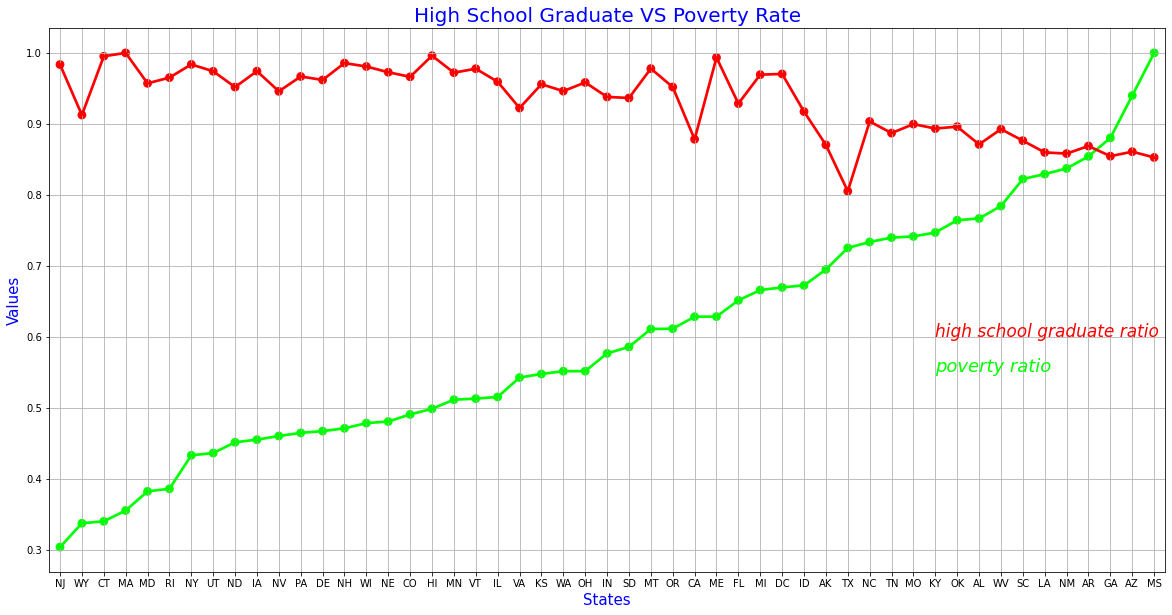

In [24]:
sorted_data['area_poverty_ratio']= sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio']= sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data=pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio', inplace=True)
# burada yukarıda denildiği gibi normalize etme işlemi yapıldı.

# visualization 
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list', y='area_poverty_ratio', data=data, color='lime', alpha=0.8)  # data=data demek seaborn kütüphanesine kullanılacak verinin yukarıdaki dataya eşit olduğunu söylemektir.
sns.pointplot(x='area_list', y='area_highschool_ratio', data=data, color='red', alpha=0.8)
plt.text(40,0.6,'high school graduate ratio', color='red', fontsize=17, style='italic')
plt.text(40,0.55, 'poverty ratio', color='lime', fontsize=18, style='italic')
plt.xlabel('States', fontsize=15, color='blue')
plt.ylabel('Values', fontsize=15, color='blue')
plt.title('High School Graduate VS Poverty Rate', fontsize=20, color='blue')
plt.grid()

<a id='3'></a>
## Joint Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


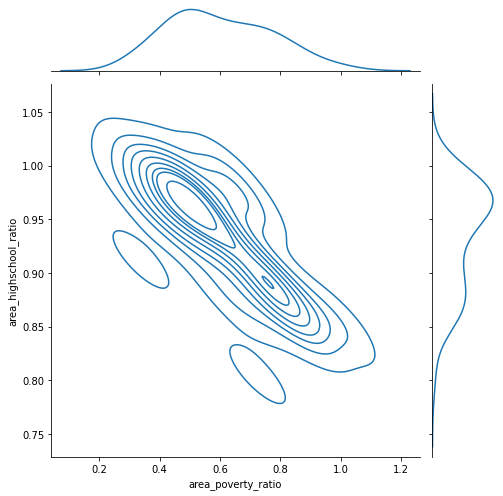

In [25]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
g= sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

* x ekseni artarken y ekseni azalmaktadır. Yoksulluk artarken orta okuldan mezun olma sayısı azalmaktadır.
* pdf: probability density function ise üstte ve sağdaki şekiller, örneğin x eksenine bakarsak fakirlik oranının en çok olduğu yerleri görmemizi sağlar. y eksenine bakarsak orta okuldan mezun olma oranı 0.97'ye denk gelmektedir.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


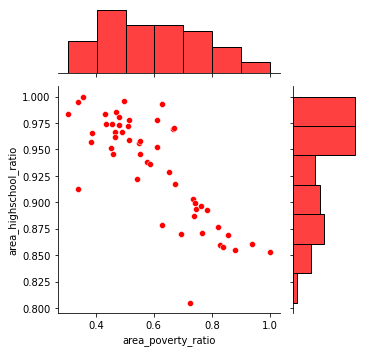

In [26]:
g= sns.jointplot("area_poverty_ratio","area_highschool_ratio", data=data, size=5, ratio=3, color="r")
# ratio buradaki alanın büyüklüğünü göstermektedir.

* yukarıdaki jointplotta data.area_poverty_ratio yazıp data üzerinde çalışacağımızı belirttik, burada ise data=data diyerek aynı işlemi gerçekleştirebiliyoruz.
* ayrıca yukarıda kind= kde(kernel density estimate) diyerek oradaki grafik bundan daha farklı oldu bu ise scatter plot kullanıldı.
* yukarıdaki ve sağdaki bar plotlar ise pdf sonuçlarını vermektedir.

<a id='4'></a>
## Pie Plot

In [27]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Burada 6 tane ırk çeşidi olduğunu görebiliyoruz şimdi buna göre pie chart için renk ve oran listeleri belirleyeceğiz.

Text(0.5, 1.0, 'Killed People According to Races')

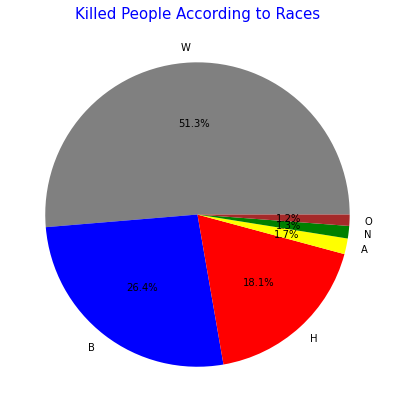

In [28]:
# Race rates according in kill data
kill.race.dropna(inplace=True) # Öldürülen insanların race feature'laında boş (NaN) değer varsa o değerleri data'dan çıkarır ve inplace=true olması ise data'nın yeni halinin kaydedilmesi anlamına geliyor.
labels= kill.race.value_counts().index  # her ırktan kaç kişi olduğuna bakıyoruz ve indexini alıp labels'e atıyoruz. (indexler W,B,H,A,N,O anlamına geliyor)
colors=['grey','blue','red','yellow','green','brown'] # her ırk için bir renk veriyoruz pie chart'ta gözükecekler 
explode=[0,0,0,0,0,0]
sizes= kill.race.value_counts().values # her ırkın değerini al yani o ırktan kaç kişi olduğunu alıyoruz ve bunu sizes'a atıyoruz.

# Visualization
plt.figure(figsize=(7,7))  # figür oluşturuduk
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')  # pie matplotlib'in bir görselleştirmesidir seaborn'un değil / orandan sonra bir basamak ondalık göster diyoruz autopct ile.
plt.title('Killed People According to Races', color='blue', fontsize=15 )

# aldığımız indexleri labels olarak atamştık burada onları pie chart'ta kullandık aynı  şekilde colors, explode ve sizes'ı da kullandık.
# pie plot sizes ile ırk oranlarını alıyor ve yüzdeliğini kendisi oluşturabiliyor. Bizim extra bir oran hesabı yapmamıza gerek kalmıyor.

<a id='5'></a>
## Lm Plot

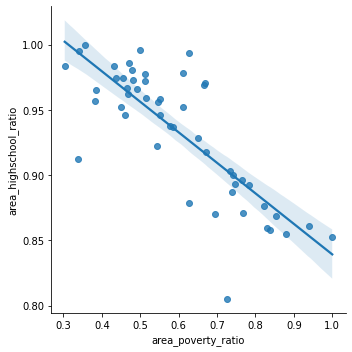

In [29]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

* Liseden mezun olma oranı giderek azalırken fakirlik oranı giderek artmaktadır.
<br><br>
Burada önemli bir nota var o da linear regression yapılmış olması. Şöyle ki grafik üzerinden baktığımızda fakirlik oranının örneğin 1.0 olduğu yerdeki okuma oranına bakmak istedik bunu bulabilmek için machine learning modeli kullanıyoruz ve tüm noktalar arasından geçen, optimum uzaklıktaki çizgi ile daha doğru sonuçlara ulaşabiliyoruz. 

<a id='6'></a>
## Kde Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


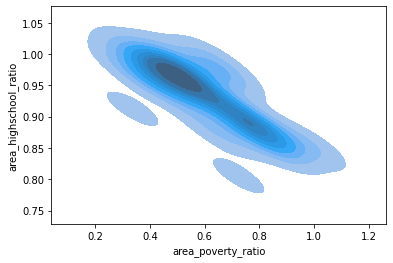

In [30]:
# Visualization of high school graduation rate vs poverty rate of each state with different style of seaborn code 
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3 )
plt.show()

<a id='7'></a>
## Violin Plot

In [31]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


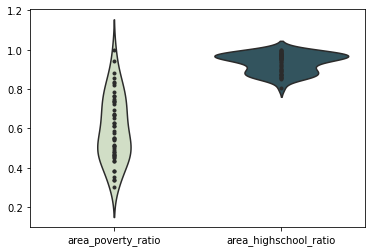

In [32]:
#Show each distribution with both violins and points
pal= sns.cubehelix_palette(2, rot=-.5, dark=.3) # burada yalnızca plot'un hangi renkten oluşacağını belirledik
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

Violin plot'un yanlara doğru genişlemesinden anlıyoruz ki burada en çok 0.9 değeri ile ilgili data'ya sahibiz.

<a id='8'></a>
## Heatmap


In [33]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


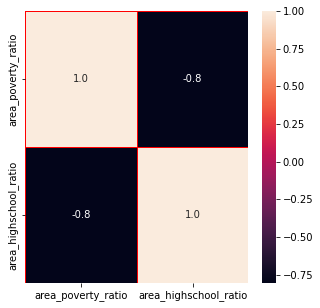

In [34]:
# Visualization of high school graduation rate vs poverty rate of each state with different style of seaborn code
f,ax= plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, linewidth=0.5, linecolor="red", fmt='.1f', ax=ax)  # annot= true olması kutucuklar üzerinde değerlerin yazmasını sağlar.
plt.show()  

<a id='9'></a>
## Box Plot

In [35]:
kill.gender.unique()

array(['M', 'F'], dtype=object)

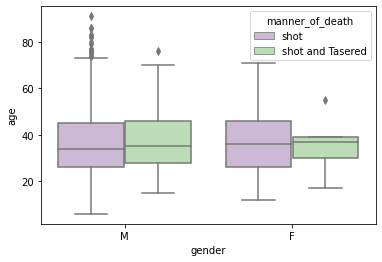

In [36]:
# manner of death
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

<a id='10'></a>
## Swarm Plot

In [37]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


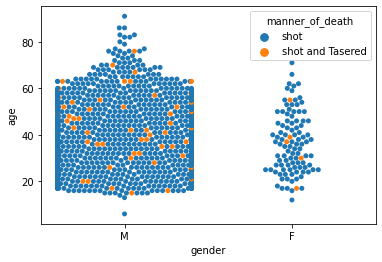

In [38]:
# manner of death (ölüm şekli)
# hue : class / data frame'den alacağımız sütun
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill)
plt.show()

* Kadınlar ve erkekler için ayrı ayrı hangi yaşta ve nasıl öldürüldükleri gösterilmektedir. 
* Maviler vurularak öldürülenler
* Turuncular vurularak ve elektrik tabancası ile öldürülenler
* Çok büyük veri kullanıldığı zaman swarm plot çizdirilmesi zorlaşır. 

<a id='11'></a>
## Pair Plot

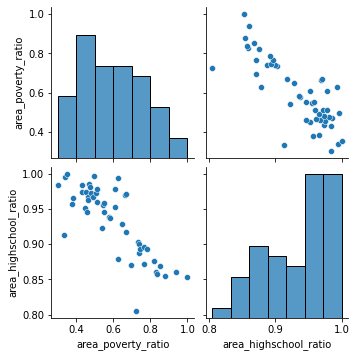

In [39]:
sns.pairplot(data)
plt.show()

* Liseden mezun olma oranı azaldıkça fakirlik artmaktadır.

<a id='12'></a>
## Count Plot

In [40]:
 kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [41]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gender')

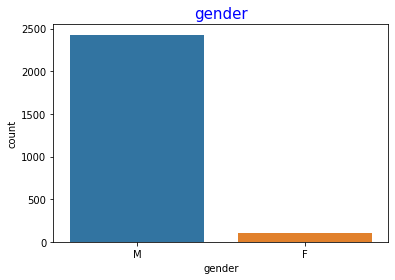

In [42]:
# manner of death
sns.countplot(kill.gender)
plt.title("gender", color='blue', fontsize=15)

Text(0.5, 1.0, 'Kill weapon')

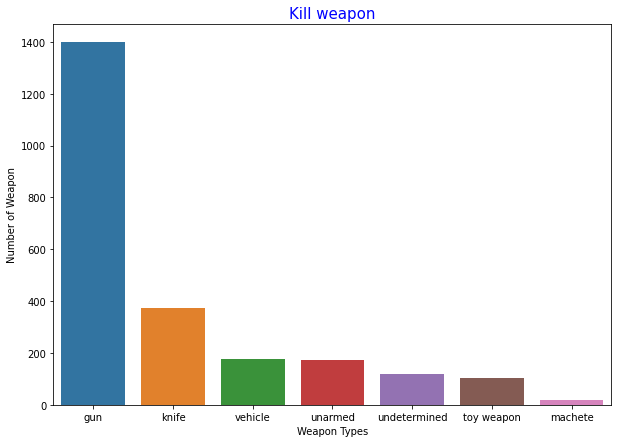

In [43]:
# kill weapon
armed= kill.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index, y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon', color='blue', fontsize=15)

Text(0.5, 1.0, 'Age of killed people')

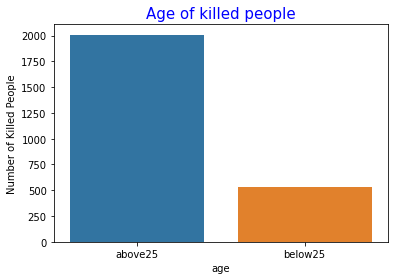

In [44]:
# age of killed people
above25= ['above25' if i>= 25 else 'below25' for i in kill.age]  # eğer 25 yaşından büyükse above25 eğer küçükse below25 yazsın
df=pd.DataFrame({'age': above25})  # age column'ı yeni bir df olarak ata
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people', color='blue', fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

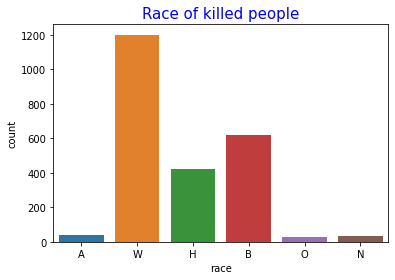

In [45]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people', color='blue', fontsize=15)

Text(0.5, 1.0, 'Most dangerous cities')

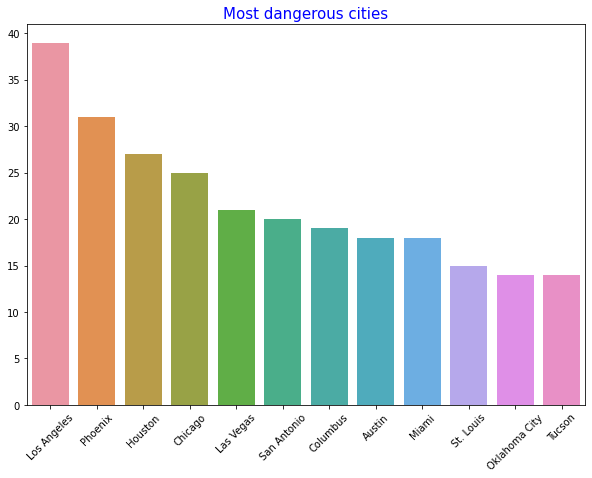

In [46]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index, y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities', color='blue', fontsize=15)

Text(0.5, 1.0, 'Most dangerous state')

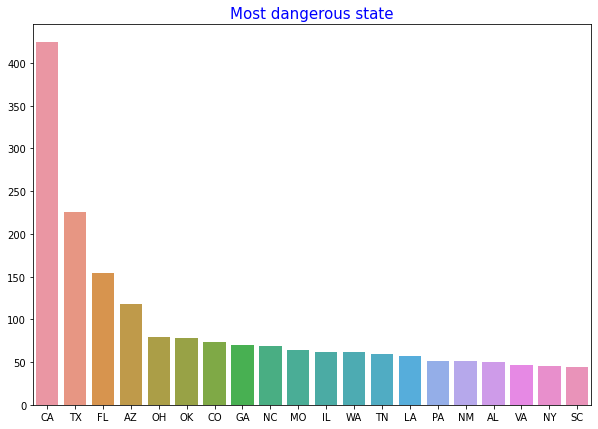

In [47]:
# most dangerous states
state= kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index, y=state[:20].values)
plt.title('Most dangerous state', color='blue', fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Having mental illness or not')

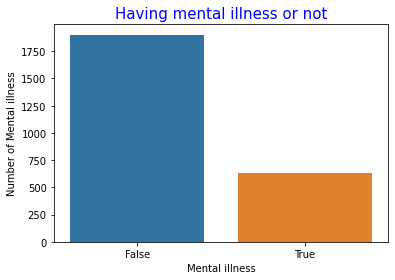

In [48]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not', color='blue', fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Threat types')

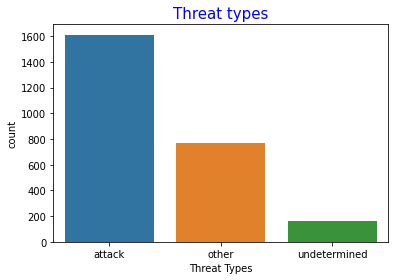

In [49]:
#Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types', color='blue', fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Flee types')

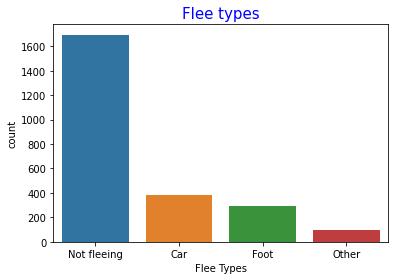

In [50]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types', color='blue', fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Having body cameras or not on Police')

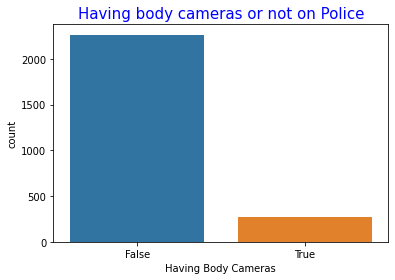

In [51]:
# having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police', color='blue', fontsize=15)

Text(0.5, 1.0, 'Kill Numbers from States')

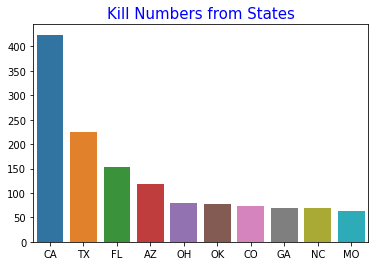

In [52]:
# Kill numbers from states in kill data
sta= kill.state.value_counts().index[:10]
sns.barplot(x=sta, y=kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States', color='blue', fontsize=15)

### 